In [21]:
%matplotlib inline
import math
import torch 
from d2l import torch as d2l 

随机梯度更新

In [22]:
def f(x1, x2):        # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2):   # 目标函数的梯度(偏导数组成)
    return 2 * x1, 4 * x2

In [23]:
def sgd(x1, x2, s1, s2, f_grad):
    """随机梯度下降, 返回更新的梯度"""
    g1, g2 = f_grad(x1, x2)
    # 模拟有噪声的梯度,以此模拟随机梯度
    g1 += torch.normal(0.0, 1, (1, ))
    g2 += torch.normal(0.0, 1, (1, ))
    eta_t = eta * lr()
    return (x1-eta*g1, x2-eta*g2, 0, 0)

epoch 50, x1: 0.184417, x2: -0.102432


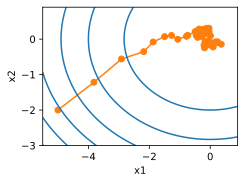

In [24]:
def constant_lr():
    return 1

eta  = 0.1                    # 全局变量
lr = constant_lr # 常数学习率    全局变量
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

动态学习率

epoch 1000, x1: -0.262188, x2: -0.145078


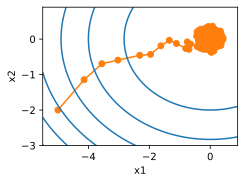

In [25]:
def exponential_lr():
    """指数衰减"""
    # 在函数外定义，而在内部更新的全局变量
    global t 
    t += 1 
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: 0.085054, x2: 0.058746


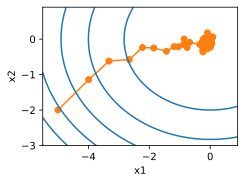

In [26]:
def polynomial_lr():
    """多项式衰减"""
    global t 
    t += 1
    return (1 + 0.1*t) ** (-0.5)

t = 1
lr = polynomial_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

In [27]:
f

<function __main__.f(x1, x2)>